<a href="https://colab.research.google.com/github/cosminnedescu/ProjectMLDL/blob/main/plots/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!rm -rf ProjectMLDL
if not os.path.isdir('/content/ProjectMLDL'):
  !git clone https://github.com/cosminnedescu/ProjectMLDL.git
  %cd /content/ProjectMLDL
  !rm -rf LICENSE README.md

Cloning into 'ProjectMLDL'...
remote: Enumerating objects: 790, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (348/348), done.
remote: Total 790 (delta 245), reused 50 (delta 50), pack-reused 389
Receiving objects: 100% (790/790), 23.36 MiB | 20.02 MiB/s, done.
Resolving deltas: 100% (394/394), done.
/content/ProjectMLDL


## Plot Test Accuracies

In [4]:
jsonfile = open("states/FineTuning/FineTuning_test_accuracy.json")
FineTuning_test_accuracy = json.load(jsonfile)

jsonfile = open("states/JointTraining/JointTraining_test_accuracy.json")
JointTraining_test_accuracy = json.load(jsonfile)

jsonfile = open("states/LWF/LWF_test_accuracy.json")
LWF_test_accuracy =json.load(jsonfile)

In [6]:
FineTuning_test_accuracy = np.array(FineTuning_test_accuracy)
JointTraining_test_accuracy = np.array(JointTraining_test_accuracy)
LWF_test_accuracy = np.array(LWF_test_accuracy)

FineTuning_test_accuracy_stats = np.array([FineTuning_test_accuracy.mean(0) * 100, FineTuning_test_accuracy.std(0) * 100]).transpose()
JointTraning_test_accuracy_stats = np.array([JointTraining_test_accuracy.mean(0) * 100, JointTraining_test_accuracy.std(0) * 100]).transpose()
LWF_test_accuracy_stats = np.array([LWF_test_accuracy.mean(0) * 100, LWF_test_accuracy.std(0) * 100]).transpose()

In [7]:
def plot_test_accuracy(finetuning, jointtraining, lwf, save_directory = None):
  finetuning_mean = np.array(finetuning)[:, 0]
  finetuning_std = np.array(finetuning)[:, 1]
  jointtraining_mean = np.array(jointtraining)[:, 0]
  jointtraining_std = np.array(jointtraining)[:, 1]
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
  x = np.arange(10, 101, 10)
  ax.errorbar(x, finetuning_mean, finetuning_std, label = 'FineTuning')
  ax.errorbar(x, jointtraining_mean, jointtraining_std, label = 'JointTraining')
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.title("Test Accuracies", loc="center")
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

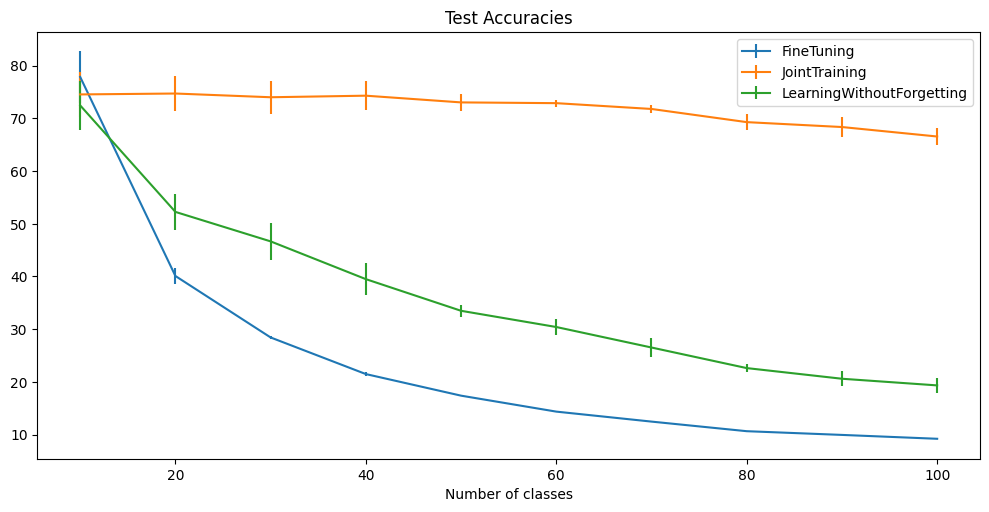

In [8]:
plot_test_accuracy(FineTuning_test_accuracy_stats, JointTraning_test_accuracy_stats, LWF_test_accuracy_stats)

## Plot Confusion Matrix

In [9]:
from data.utils_plot import plot_confusion_matrix

In [10]:
jsonfile = open("states/ConfusionMatrix/LWF_predictions.json")
LWF_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/LWF_true_labels.json")
LWF_true_labels =json.load(jsonfile)

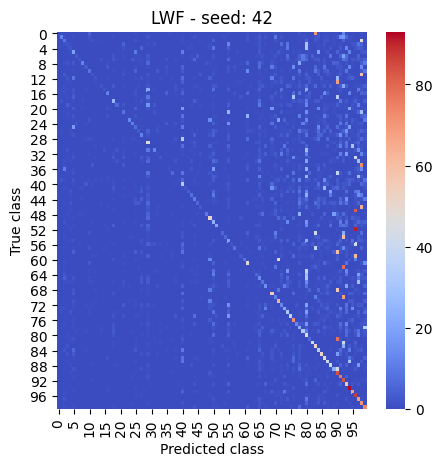

In [18]:
targets = np.array(LWF_true_labels[0])
preds = np.array(LWF_predictions[0])

plot_confusion_matrix(targets, preds, 42, 'LWF', cmap='coolwarm')